In [1]:



import pandas as pd
import numpy as np
import math
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_curve, mean_squared_error,precision_score, recall_score,f1_score,\
precision_recall_curve, classification_report, auc,RocCurveDisplay
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate,GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
os.chdir(r'D:\Scaler_Notes\Scaler_Business_Cases')

In [3]:
df=pd.read_csv('Clustering_Business_Case_Study.csv')
df_copy=df.copy()

In [4]:
df_copy

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [5]:
df_copy['job_position'].value_counts()

Backend Engineer                  43554
FullStack Engineer                24717
Other                             18071
Frontend Engineer                 10417
Engineering Leadership             6870
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

### Missing Values 

In [6]:
df_copy.isna().sum()/len(df)*100

Unnamed: 0           0.000000
company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [7]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
# imputer.fit(df_copy)
# # transform the dataset
# df_copy = imputer.transform(df_copy)

In [8]:
df_copy.drop('Unnamed: 0',axis=1, inplace=True)

In [9]:
len(df_copy['company_hash'].unique())

37300

In [10]:
df_copy.shape

(205843, 6)

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


Since the dataset has categorical values we cannot use KNN Imputation 

#### Dropping the Null Value

In [12]:
df_copy.dropna(inplace=True)

In [13]:
df_copy.shape

(153206, 6)

In [14]:
df_copy['orgyear']=df_copy['orgyear'].astype(int)
df_copy['ctc_updated_year']=df_copy['ctc_updated_year'].astype(int)

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153206 entries, 0 to 205329
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   company_hash      153206 non-null  object
 1   email_hash        153206 non-null  object
 2   orgyear           153206 non-null  int32 
 3   ctc               153206 non-null  int64 
 4   job_position      153206 non-null  object
 5   ctc_updated_year  153206 non-null  int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 7.0+ MB


#### Unique Emails 

In [16]:
len(df_copy['email_hash'].unique())

133146

In [17]:
df_copy.groupby(['email_hash']).size()

email_hash
00003288036a44374976948c327f246fdbdf077854690475243a9c91d3b1cf9f    1
0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6a761391159aa77f3fa    1
0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032ace6b6223c48468887    1
000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d461a50a3e16626a4177    1
0001b94dbb1e85477b07fb6558ead3456c3735893c81f4a39a37deadf7106b5d    2
                                                                   ..
fffbf480e0003fe636e4d73543eaa472305e1a720c1fd31bf8515856177b3d4d    1
fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914ebadddd76333a7855fc    1
fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b015e59d649b349641174    1
ffff49f963e4493d8bbc7cc15365423d84a767259f7200a11548e704e156d898    1
ffffa3eb3575f43b86d986911463dce7bcadcea227e5a4b0f1756744efdb7477    1
Length: 133146, dtype: int64

#### Check for Duplicates in the Dataset

In [18]:
duplicate_values = df_copy.duplicated()

In [19]:
duplicate_values.sum()

18

There are 18 duplicate records

#### Removing Duplicate Values

In [20]:
df_copy = df_copy.drop_duplicates()

In [21]:
len(df_copy)

153188

In [22]:
df_copy.isna().sum()

company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

In [23]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
# imputer.fit(df)
# # transform the dataset
# df_new = imputer.transform(df)

In [24]:
def regular_exp(s):
    pattern=r'[^a-zA-Z0-9\s]'
    return re.sub(pattern, '',s)

In [25]:
def regular_find_special(s):
    pattern=r'[^a-zA-Z0-9]+'
    return re.findall(pattern, s)

In [26]:
#df_copy['job_position'].apply(lambda x: re.findall(r'\d+',x))
df_copy[df_copy['job_position']=='91']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
58179,zgn vuurxwvmrt vwwghzn,9021063ea27d2c461c6b4c7e8c430d68eb3ed7affa3e19...,2021,500000,91,2021


In [27]:
df_copy['job_position'].apply(lambda x:regular_find_special(x))

0          []
1         [ ]
2         [ ]
3         [ ]
4         [ ]
         ... 
205324    [ ]
205326    [ ]
205327    [ ]
205328    [ ]
205329    [ ]
Name: job_position, Length: 153188, dtype: object

In [28]:
df_copy.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019


In [29]:
df_copy.loc[:,'job_position']=df_copy.loc[:,'job_position'].apply(lambda x: regular_exp(x))

C:\Users\cm_nm\AppData\Local\Temp\ipykernel_22516\295008399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.loc[:,'job_position']=df_copy.loc[:,'job_position'].apply(lambda x: regular_exp(x))


In [30]:
df_copy['job_position'].value_counts()

Backend Engineer                                43532
FullStack Engineer                              24700
Other                                           18058
Frontend Engineer                               10412
Engineering Leadership                           6867
                                                ...  
Web Designer                                        1
Compliance auditor                                  1
91                                                  1
Senior Software Development Engineer Backend        1
Android Application developer                       1
Name: job_position, Length: 1005, dtype: int64

In [31]:
df_copy.shape

(153188, 6)

#### Creating the new feature Years of Experience

In [32]:
df_copy['ctc_updated_year'].max()

2021

In [33]:
df_copy['orgyear'].max()

2204

In [34]:
df_copy.loc[df_copy['orgyear']>2023]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
2211,phrxkv,3394674bb6bb1de6289e931853fa0bd131c811e0054a92...,2031,1500000,Backend Engineer,2020
2415,xb v onhatzn,ef3565a969075def44d98b6df51f8bbfb42248d0008514...,2024,110000,Frontend Engineer,2021
3113,onhatzn vn bzzxn vrrvyvmva,c723c1d7ec4d808af6f77d58594e36884340cb803389d6...,2024,1200000,Other,2021
3893,qtbgnt vzvrjnxwo lgmo,1439cc5e284ee01eaacb919569f4198f8b569612ac5134...,2024,1400000,FullStack Engineer,2019
6542,hztburgjta,351a4ff69d80ed96df7206d078261dff33fc7b900a13c1...,2024,180000,Backend Engineer,2021
...,...,...,...,...,...,...
184636,nyghsynfgqpo,d89de2fb52e863b58403dec0fd83a53134c666530c7503...,2024,850000,Frontend Engineer,2021
191308,cggbofvj,3d96a8c43234f0bfa905b7c4941fe74a4e5e9b6d761f64...,2024,60000,Frontend Engineer,2021
191361,zvz,207390e4bc6a321ada3bc951a9a5391ff54232e48dacc6...,2024,1400000,Engineering Leadership,2021
198187,xb v onhatzn,9429a19771ae913f169917d380c94f003115aaaf904388...,2025,300000,Other,2021


Replacing the orgyear greater than current year with 2023

In [35]:
df['orgyear']=np.where(df['orgyear']>2023, 2023, df['orgyear'])

In [36]:
def year_treatment(x):
    if x['ctc_updated_year']<x['orgyear']:
        x['ctc_updated_year']=x['orgyear']
    return x['ctc_updated_year']

In [37]:
df_copy['ctc_updated_year']=df_copy.apply(year_treatment, axis=1)

C:\Users\cm_nm\AppData\Local\Temp\ipykernel_22516\2753400490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['ctc_updated_year']=df_copy.apply(year_treatment, axis=1)


In [38]:
df_copy['ctc_updated_year']

0         2020
1         2019
2         2020
3         2019
4         2019
          ... 
205324    2021
205326    2021
205327    2021
205328    2021
205329    2021
Name: ctc_updated_year, Length: 153188, dtype: int64

In [39]:
#df_copy['ctc_updated_year']=np.where(df_copy['ctc_updated_year']<df_copy['orgyear'], df_copy['orgyear'],df_copy['ctc_updated_year'])

In [40]:
df_copy['Years_of_experience']=df_copy['ctc_updated_year']-df_copy['orgyear']

C:\Users\cm_nm\AppData\Local\Temp\ipykernel_22516\1542512639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Years_of_experience']=df_copy['ctc_updated_year']-df_copy['orgyear']


In [41]:
df_copy['Years_of_experience']

0         4
1         1
2         5
3         2
4         2
         ..
205324    5
205326    2
205327    6
205328    2
205329    4
Name: Years_of_experience, Length: 153188, dtype: int64

In [42]:
df_copy.loc[df_copy['Years_of_experience']<0]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience


In [43]:
df_copy

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,1
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,5
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017,700000,Backend Engineer,2019,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017,1400000,FullStack Engineer,2019,2
...,...,...,...,...,...,...,...
205324,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016,1500000,FullStack Engineer,2021,5
205326,xzegojo,aec7061c552cfd56fe635ca0e9d347d2e63a95dbcd2ef8...,2019,1200000,FullStack Engineer,2021,2
205327,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015,1000000,Data Scientist,2021,6
205328,ahzzyhbmj,617a49afbc5efc0f1692780d20fc566ba4ed4f1125491c...,2019,1100000,Data Scientist,2021,2


In [44]:
#df_prepr=df.groupby('company_hash')['ctc'].quantile([0.25,0.5,0.75,1]).unstack()

In [45]:
#df_prepr.columns=['25th Percentile_salary','50th Percentile_salary', '75th Percentile_salary','100th Percentile_salary']

In [46]:
df_prepr_1=df_copy.groupby(['company_hash','job_position','Years_of_experience'])['ctc'].quantile([0.50, .75]).unstack()

In [47]:
df_prepr_1

0.50  \
company_hash                   job_position       Years_of_experience              
0                              Other              0                     100000.0   
0000                           Other              3                     300000.0   
01 ojztqsj                     Android Engineer   3                     270000.0   
                               Frontend Engineer  8                     830000.0   
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2                    1100000.0   
...                                                                          ...   
zyuw rxbxnta                   Frontend Engineer  13                   2400000.0   
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7                     940000.0   
zz                             Other              7                    1370000.0   
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 4                     600000.0   
zzzbzb                         Other              30                    720000.0   

                                                                            0.75  
company_hash                   job_position       Years_of_experience             
0                              Other              0                     100000.0  
0000                           Other              3                     300000.0  
01 ojztqsj                     Android Engineer   3                     270000.0  
                               Frontend Engineer  8                     830000.0  
05mz exzytvrny uqxcvnt rxbxnta Backend Engineer   2                    1100000.0  
...                                                                          ...  
zyuw rxbxnta                   Frontend Engineer  13                   2400000.0  
zyvzwt wgzohrnxzs tzsxzttqo    Frontend Engineer  7                     940000.0  
zz                             Other              7                    1370000.0  
zzb ztdnstz vacxogqj ucn rna   FullStack Engineer 4                     600000.0  
zzzbzb                         Other              30                    720000.0  

[92417 rows x 2 columns]

In [48]:
df_prepr_1=df_prepr_1.reset_index()

In [49]:
df_prepr_1.columns=['company_hash','job_position','Years_of_experience','.5_designation','.75_designation']

In [50]:
df_prepr_1

,company_hash,job_position,Years_of_experience,.5_designation,.75_designation
0,0,Other,0,100000.0,100000.0
1,0000,Other,3,300000.0,300000.0
2,01 ojztqsj,Android Engineer,3,270000.0,270000.0
3,01 ojztqsj,Frontend Engineer,8,830000.0,830000.0
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,2,1100000.0,1100000.0
...,...,...,...,...,...
92412,zyuw rxbxnta,Frontend Engineer,13,2400000.0,2400000.0
92413,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,7,940000.0,940000.0
92414,zz,Other,7,1370000.0,1370000.0
92415,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,4,600000.0,600000.0


In [51]:
df_copy=pd.merge(df_copy,df_prepr_1, on=['company_hash','job_position','Years_of_experience'],how='inner')

In [52]:
df_copy

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,1085000.0,1092500.00
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,1085000.0,1092500.00
2,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018,449999,FullStack Engineer,2019,1,459999.5,464999.75
3,qtrxvzwt xzegwgbb rxbxnta,73e4f61b4b885458561a27990fe136e4bd9cec2425c5d9...,2019,470000,FullStack Engineer,2020,1,459999.5,464999.75
4,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015,2000000,Backend Engineer,2020,5,2000000.0,2000000.00
...,...,...,...,...,...,...,...,...,...
153183,x vb zgn fgqpxzs,93f7de0cfe1093343f53a9f6c47c19c00342887832baed...,2023,200000,Data Scientist,2023,0,200000.0,200000.00
153184,ugrxwjmvkvvqwgb,6e45d6db540ae9496aea56f82746de48e16a55672c82e8...,2021,1000000,Backend Engineer,2021,0,1000000.0,1000000.00
153185,wos xzntqzvnxgzvr,ee1e251ebb54cffeddc09244bbc0ed122a1cf59511bbc1...,2016,1500000,FullStack Engineer,2021,5,1500000.0,1500000.00
153186,wgbuzgcv wgznqvwn,251f5f33672f58c65f43e94d0fc0fef69a7f6149b3b4db...,2015,1000000,Data Scientist,2021,6,1000000.0,1000000.00


In [53]:
def segment(ctc,ctc_50,ctc_75): 
    if ctc<=ctc_50:
        return 3
    elif ctc>ctc_50 and ctc<=ctc_75:
        return 2
    else:
        return 1

In [54]:
df_copy['designation'] =df_copy.apply(lambda x: segment(x['ctc'],x['.5_designation'],x['.75_designation']),axis=1)

In [55]:
df_copy['designation'].unique()

array([1, 3, 2], dtype=int64)

In [56]:
df_prepr_2=df.groupby(['company_hash','job_position'])['ctc'].quantile([.50,0.75]).unstack()

In [57]:
df_prepr_2=df_prepr_2.reset_index()

In [58]:
df_prepr_2

,company_hash,job_position,0.5,0.75
0,0,Other,100000.0,100000.0
1,0000,Other,300000.0,300000.0
2,01 ojztqsj,Android Engineer,270000.0,270000.0
3,01 ojztqsj,Frontend Engineer,830000.0,830000.0
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.0,1100000.0
...,...,...,...,...
58982,zyuw rxbxnta,Frontend Engineer,2400000.0,2400000.0
58983,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.0,940000.0
58984,zz,Other,1370000.0,1370000.0
58985,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0,600000.0


In [59]:
df_prepr_2.columns=['company_hash','job_position','.5_class','.75_class']

In [60]:
df_prepr_2

,company_hash,job_position,.5_class,.75_class
0,0,Other,100000.0,100000.0
1,0000,Other,300000.0,300000.0
2,01 ojztqsj,Android Engineer,270000.0,270000.0
3,01 ojztqsj,Frontend Engineer,830000.0,830000.0
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.0,1100000.0
...,...,...,...,...
58982,zyuw rxbxnta,Frontend Engineer,2400000.0,2400000.0
58983,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.0,940000.0
58984,zz,Other,1370000.0,1370000.0
58985,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0,600000.0


In [61]:
df_copy=pd.merge(df_copy,df_prepr_2, on=['company_hash','job_position'],how='inner')

In [62]:
df_copy['class'] =df_copy.apply(lambda x: segment(x['ctc'],x['.5_class'],x['.75_class']),axis=1)

In [63]:
df_copy['class'].unique()

array([1, 3, 2], dtype=int64)

In [64]:
df_prepr_3=df.groupby(['company_hash'])['ctc'].quantile([.5,0.75]).unstack()

In [65]:
df_prepr_3=df_prepr_3.reset_index()

In [66]:
df_prepr_3.columns=['company_hash','.5_Tier','.75_Tier']

In [67]:
df_prepr_3

,company_hash,.5_Tier,.75_Tier
0,0,100000.0,100000.0
1,0000,300000.0,300000.0
2,01 ojztqsj,550000.0,690000.0
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.0,1100000.0
4,1,175000.0,212500.0
...,...,...,...
37294,zyvzwt wgzohrnxzs tzsxzttqo,940000.0,940000.0
37295,zz,935000.0,1152500.0
37296,zzb ztdnstz vacxogqj ucn rna,600000.0,600000.0
37297,zzgato,130000.0,130000.0


In [68]:
df_copy=pd.merge(df_copy,df_prepr_3, on=['company_hash'],how='inner')

In [69]:
df_copy['Tier']=df_copy.apply(lambda x: segment(x['ctc'],x['.5_Tier'],x['.75_Tier']),axis=1)

In [70]:
df_prepr_4=df_copy.groupby(['Years_of_experience'])['ctc'].quantile([.50,0.75]).unstack()
df_prepr_4=df_prepr_4.reset_index()
df_prepr_4.columns=['Years_of_experience', '0.5_yoe_ctc','0.75_yoe_ctc']
df_prepr_4

,Years_of_experience,0.5_yoe_ctc,0.75_yoe_ctc
0,0,750000.0,1400000.00
1,1,700000.0,1200000.00
2,2,740000.0,1290000.00
3,3,800000.0,1400000.00
4,4,869999.0,1448500.00
5,5,1000000.0,1600000.00
6,6,1100000.0,1800000.00
7,7,1280000.0,2000000.00
8,8,1500000.0,2113750.00
9,9,1580000.0,2400000.00


In [71]:
df_copy.loc[df_copy['Years_of_experience']>40]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier
21832,wxowg,19bd55263d4e8cb5659b50814dc18b1fbdd1b7e0689e4b...,5,1000000,Backend Engineer,2019,2014,1000000.0,1000000.0,3,1480000.0,2000000.0,3,1590000.0,2250000.0,3
40159,utqoxontzn ojontbo,9bec1bea9b46f4dcbbb35564e5fef83d1fa52cd2c92b96...,4,2780000,Backend Architect,2019,2015,2780000.0,2780000.0,3,2860000.0,3580000.0,3,810000.0,1300000.0,1
50732,hzxntaytvrny sqghu,82e77fdd3e43e37ec6b805bbfe624d7cd24b37cb0a4317...,3,540000,QA Engineer,2019,2016,540000.0,540000.0,3,640000.0,827500.0,3,1240000.0,1750000.0,3
57874,vrongb,a568e7ea5f84dcd0d6f886a943dc71652652de9b00c8c4...,38,3000000,Engineering Leadership,2019,1981,3000000.0,3000000.0,3,1367500.0,2160000.0,1,919999.0,1445000.0,1
78208,adw ntwyzgrgsj,32a3ee8218df48d1ba56e0e87323a5225c83929d00a6d8...,3,1250000,Devops Engineer,2019,2016,1250000.0,1250000.0,3,930000.0,1200000.0,1,600000.0,1150000.0,1
80894,uyxrxuo,c0787fd47b636c7cb790a07196a71cfd80b9aa5419b0be...,3,1950000,Devops Engineer,2019,2016,1950000.0,1950000.0,3,1000000.0,1725000.0,1,1215000.0,2062500.0,2
82209,st ytvrnywvqt,de72685914984cd9e1b0ec13223cd266f3c81d9517f282...,1972,2300000,Engineering Leadership,2019,47,2300000.0,2300000.0,3,3050000.0,4150000.0,3,1510000.0,2615000.0,2
83712,bvzyvnnvz voogwxvnto,e725ad631cdc4c57a354f59c98b6441f0672c6b7bb8adb...,83,730000,Backend Engineer,2019,1936,730000.0,730000.0,3,950000.0,1275000.0,3,1000000.0,1300000.0,3
83810,fgrntqo prhftq,e0501afab1e9cc00253928e1488701685039437b1780f6...,3,1580000,Engineering Leadership,2019,2016,1580000.0,1580000.0,3,2700000.0,2730000.0,3,859999.5,1400000.0,1
94825,vcr,c0118cfea338955b1a4c66292987ab2359ad31e0b49a51...,6,1680000,Data Scientist,2019,2013,1680000.0,1680000.0,3,1680000.0,1680000.0,3,625000.0,950000.0,1


In [72]:
df_copy=pd.merge(df_copy,df_prepr_4, on=['Years_of_experience'],how='inner')

In [73]:
df_copy['YoE_Cluster']=df_copy.apply(lambda x: segment(x['ctc'],x['0.5_yoe_ctc'],x['0.75_yoe_ctc']),axis=1)

In [74]:
df_copy['YoE_Cluster'].unique()

array([2, 3, 1], dtype=int64)

In [75]:
df_copy

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016,1100000,Other,2020,4,1085000.0,1092500.0,1,1085000.0,1092500.0,1,1070000.0,1500000.0,2,869999.0,1448500.0,2
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,1085000.0,1092500.0,3,1085000.0,1092500.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,2
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,1000000.0,1000000.0,3,750000.0,875000.0,1,1070000.0,1500000.0,3,869999.0,1448500.0,2
3,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,600000.0,600000.0,3,600000.0,600000.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,3
4,qtrxvzwt xzegwgbb rxbxnta,1fe7524aa9dc2ae9ee2eb02f36078a9c644f987576eb59...,2016,600000,FullStack Engineer,2020,4,990000.0,1185000.0,3,800000.0,1300000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152514,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,1971,5500000,Engineering Leadership,2019,48,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3
152515,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,1970,140000,Engineering Leadership,2020,50,140000.0,140000.0,3,140000.0,140000.0,3,145000.0,147500.0,3,140000.0,140000.0,3
152516,wxowg cxatg ntwyzgrgsxto xzaxv ucn rna,c3cce99fc54361b5c213f8043505d2990c8dfa93669df8...,200,3000000,Engineering Leadership,2019,1819,3000000.0,3000000.0,3,2900000.0,2950000.0,1,2900000.0,2950000.0,1,3000000.0,3000000.0,3
152517,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,1900,3170000,Engineering Leadership,2019,119,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3


### EDA

In [266]:
df_copy['job_position'].value_counts()[:10]

Backend Engineer          43532
FullStack Engineer        24700
Other                     18058
Frontend Engineer         10412
Engineering Leadership     6867
QA Engineer                6584
Data Scientist             5364
Android Engineer           5347
SDET                       4967
Devops Engineer            4609
Name: job_position, dtype: int64

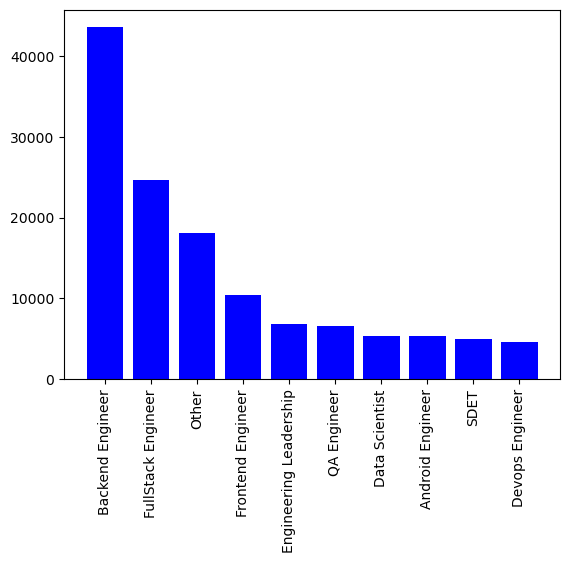

In [267]:
plt.bar(df_copy['job_position'].value_counts()[:10].index,df_copy['job_position'].value_counts()[:10].values, color='b' )
plt.xticks(rotation = 90)
plt.show()

The most popular job title is of BackEnd Engineer

What is the salary range for Backend Engineer

In [338]:
df_copy.loc[df_copy['job_position']=='Backend Engineer'].ctc.min()
df_copy.loc[df_copy['job_position']=='Backend Engineer'].ctc.max()

200000000

In [268]:
t=df_copy['ctc'].value_counts()[:10].index

In [269]:
t=[str(i) for i in t ]

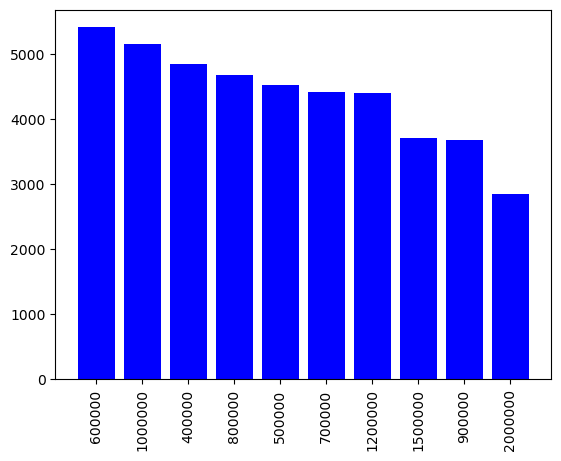

In [270]:
plt.bar(t,df_copy['ctc'].value_counts()[:10].values, color='b' )
plt.xticks(rotation = 90)
plt.show()

In [271]:
print(df_copy['ctc'].value_counts()[:10].index.min())
print(df_copy['ctc'].value_counts()[:10].index.max())

400000
2000000


The Top 10 CTC range between 30000 and 1500000

### Outlier Detection

<Axes: >

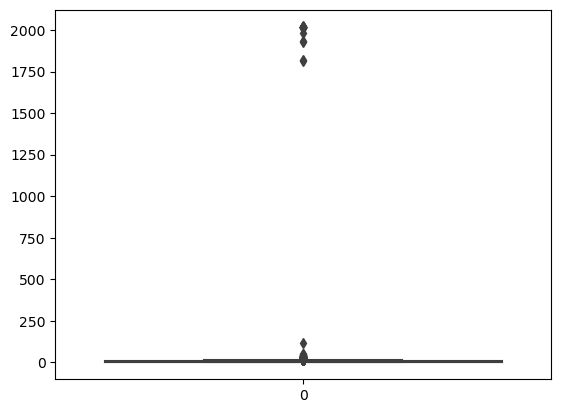

In [276]:
sns.boxplot(df_copy['Years_of_experience'])

YearsOf_experience has high number of outliers

In [281]:
print(df_copy['Years_of_experience'].min())
print(df_copy['Years_of_experience'].max())

0
2021


In [282]:
df_copy[df_copy['Years_of_experience']==2021]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster
152512,rgsfvqa,b511b17a1aaaa822c6b5d6a04498ff3121808101697407...,0,1600000,Frontend Engineer,2021,2021,1600000.0,1600000.0,3,1300000.0,1450000.0,1,1600000.0,1845000.0,3,1600000.0,1600000.0,3


In [273]:
df_copy[df_copy['company_hash']=='wgxznqxmt ntwy exzntwy ctznhqt']

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster
152518,wgxznqxmt ntwy exzntwy ctznhqt,a9393ceb6f438669a12e2f5632d515ba2fdb2656c8d727...,201,3500000,Product Manager,2017,1816,3500000.0,3500000.0,3,3500000.0,3500000.0,3,3500000.0,3500000.0,3,3500000.0,3500000.0,3


<Axes: xlabel='orgyear'>

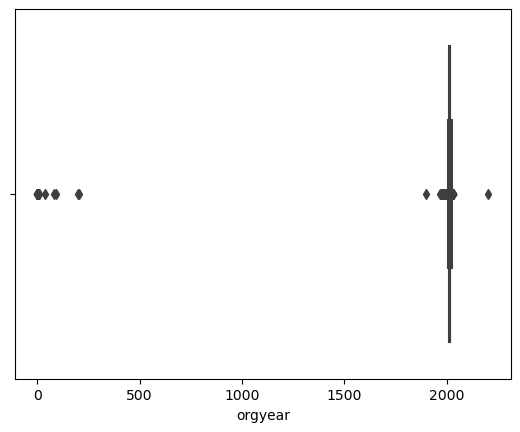

In [284]:
sns.boxplot(data=df_copy, x='orgyear')

As Year of experience cannot be greater than 50 so dropping all the records having years of experience greater than 50

In [300]:
df_copy['ctc'].min()

2

In [301]:
df_copy['ctc'].max()

200000000

### Outlier Treatment for Year_of_experience

In [291]:
df_copy[df_copy['Years_of_experience']>50].index

Int64Index([152471, 152472, 152473, 152478, 152479, 152480, 152481, 152482,
            152483, 152487, 152489, 152490, 152491, 152493, 152500, 152501,
            152506, 152507, 152508, 152509, 152510, 152511, 152512, 152516,
            152517, 152518],
           dtype='int64')

In [292]:
df_copy.drop(df_copy[df_copy['Years_of_experience']>50].index,inplace=True)

In [294]:
df_copy.shape

(152493, 19)

### Outlier Treatment for ctc via IQR Method

In [304]:
q1=df_copy['ctc'].quantile(.25)
q3=df_copy['ctc'].quantile(.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(q1)
print(q3)
print(iqr)
print(ul)
print(ll)

570000.0
1710000.0
1140000.0
3420000.0
-1140000.0


As lower limit cannot be negative we cannot use lower limit to impute the lower limit of ctc

In [306]:
#Imputing minimum CTC as 3 lakhs because minimum ctc cannot be less than 300000 as per the current job market
df_copy['ctc']=np.where(df_copy['ctc']<300000, 300000,df_copy['ctc'])

In [307]:
df_copy['ctc'].min()

300000

### Distribution Plots - Univariate

<Axes: xlabel='ctc', ylabel='Density'>

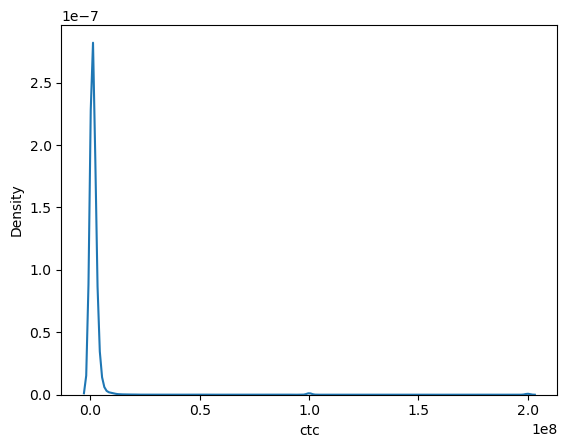

In [314]:
sns.kdeplot(df_copy['ctc'])

<Axes: xlabel='Years_of_experience', ylabel='Density'>

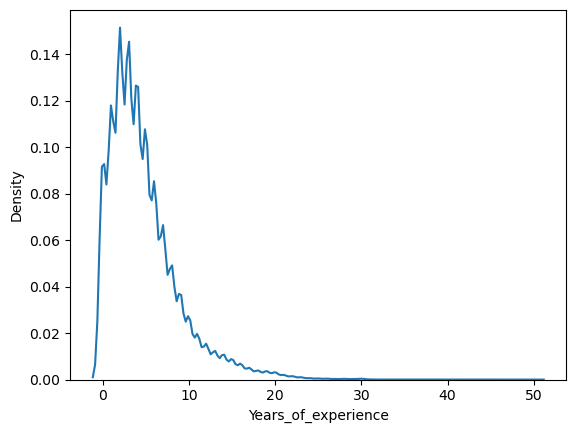

In [315]:
sns.kdeplot(df_copy['Years_of_experience'])

<BarContainer object of 3 artists>

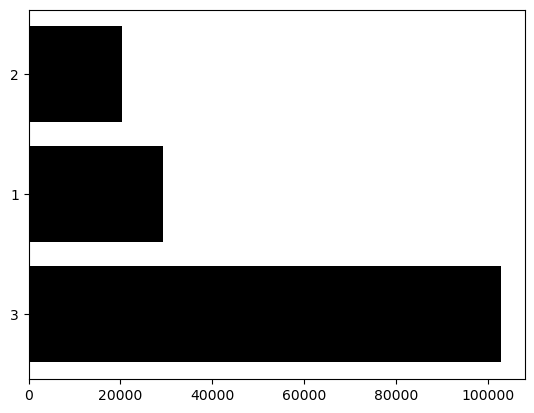

In [342]:
df_copy['class'].value_counts().index.astype('str')
plt.barh(df_copy['class'].value_counts().index.astype('str'),df_copy['class'].value_counts().values, color='black')

<BarContainer object of 3 artists>

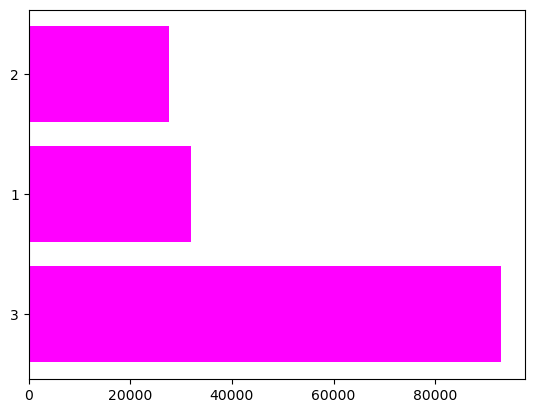

In [344]:
df_copy['Tier'].value_counts().index.astype('str')
plt.barh(df_copy['Tier'].value_counts().index.astype('str'),df_copy['Tier'].value_counts().values, color='magenta')

<BarContainer object of 3 artists>

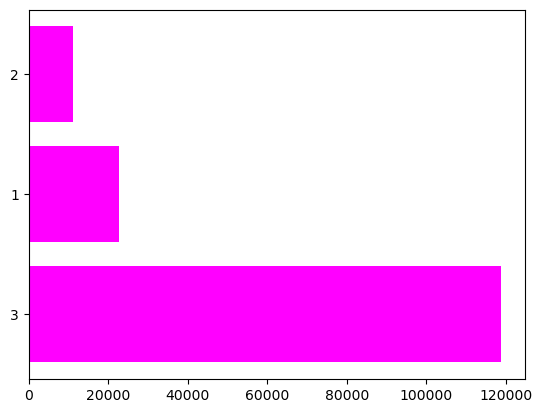

In [345]:
df_copy['designation'].value_counts().index.astype('str')
plt.barh(df_copy['designation'].value_counts().index.astype('str'),df_copy['designation'].value_counts().values, color='magenta')

<Axes: xlabel='Tier'>

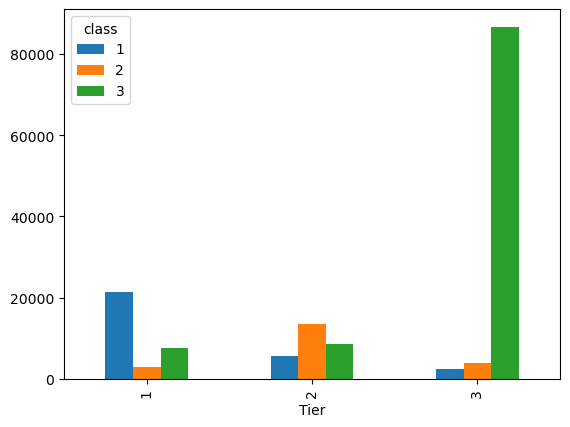

In [350]:
pd.crosstab(df_copy['Tier'],df_copy['class']).plot.bar()

Within Tier 1 Class is the highest 

<Axes: xlabel='designation'>

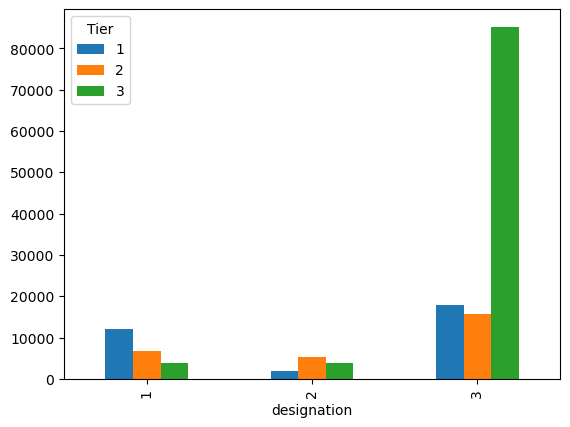

In [351]:
pd.crosstab(df_copy['designation'],df_copy['Tier']).plot.bar()

<Axes: xlabel='designation'>

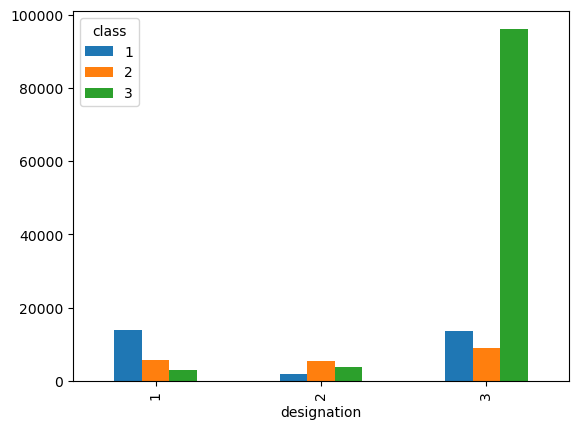

In [354]:
pd.crosstab(df_copy['designation'],df_copy['class']).plot.bar()

<Axes: xlabel='YoE_Cluster'>

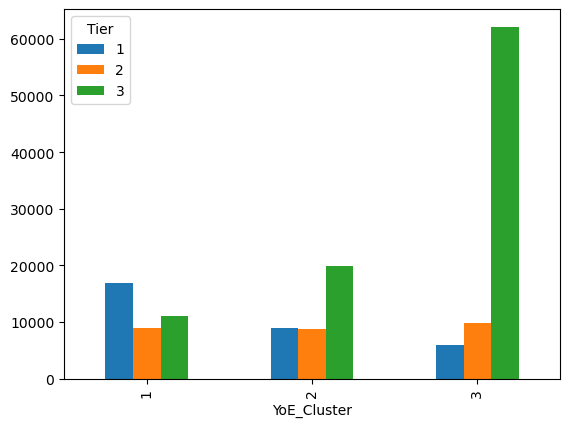

In [355]:
pd.crosstab(df_copy['YoE_Cluster'],df_copy['Tier']).plot.bar()

<Axes: xlabel='YoE_Cluster'>

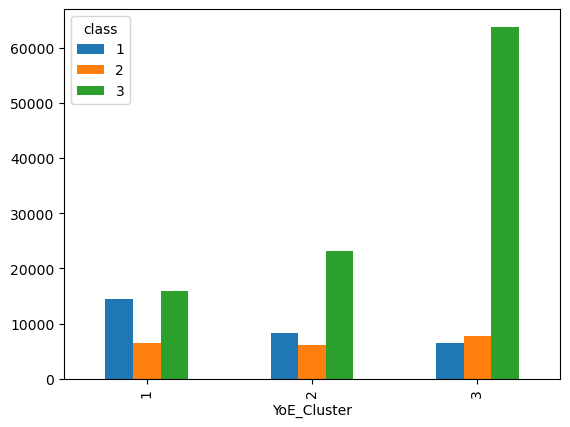

In [356]:
pd.crosstab(df_copy['YoE_Cluster'],df_copy['class']).plot.bar()

#### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [361]:
tier_1=df_copy[df_copy['Tier']==1]

In [368]:
def salary_greater_than_most_peers(x):
    #90th percentile salary
    x['peer_comparison']=x['ctc']>x['ctc'].quantile(.90)
    return x

In [372]:
%%time
employees_with_salary_greater_than_most_peers_in_the_company=\
tier_1.groupby('company_hash').apply(salary_greater_than_most_peers)

<timed exec>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


CPU times: total: 11 s
Wall time: 11 s


In [374]:
%%time
#Top 10 employees(earning more than most of the employees in the company)
employees_with_salary_greater_than_most_peers_in_the_company.groupby('company_hash')\
.apply(lambda x:x['ctc'].sort_values(ascending=False).head(10))

CPU times: total: 6.45 s
Wall time: 6.47 s


company_hash        
01 ojztqsj    73984      830000
1             120259     300000
1 jtvq        32569     1700000
123ongqto     15455     2560000
1bs           12606     3750000
                         ...   
zxztrtvuo     133876    2250000
              77669     1800000
              56785     1780000
              92324     1500000
zz            136922    1370000
Name: ctc, Length: 16050, dtype: int64

#### Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1

In [116]:
employees_class_1=df_copy.loc[df_copy['class']==1].reset_index()

In [119]:
employees_class_1.drop('index',axis=1,inplace=True)

In [122]:
def func(x):
    x["Is_ctc_greater_than_company_peers"]=x["ctc"]-x["ctc"].mean()>0
    return x

In [127]:
df_filtered_peers_company_wise=employees_class_1.groupby('email_hash').apply(func)
df_filtered_peers_company_wise

,,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster,Is_ctc_greater_than_company_peers
email_hash,,,,,,,,,,,,,,,,,,,,,
00037a2e4fcfe2830d91270102aaaf105a324a3ce17075a03aa5587e2b77efa2,22789,ko,00037a2e4fcfe2830d91270102aaaf105a324a3ce17075...,2012,1800000,SDET,2021,9,1800000.0,1800000.0,3,1450000.0,1575000.0,1,950000.0,1400000.0,1,1580000.0,2400000.0,2,False
00093e03808721b93128b626ae143528cba1fbc69eb4eb2a1675035a3ad45f4b,23900,ctqxkgz,00093e03808721b93128b626ae143528cba1fbc69eb4eb...,2010,1383000,Devops Engineer,2017,7,1366500.0,1587250.0,2,1000000.0,1235000.0,1,1100000.0,1500000.0,2,1280000.0,2000000.0,2,False
000e23cee1f1c00d338672c6dbff0ea7a560916ccac2588c2ba9f52b1a78d096,25986,xzegojo,000e23cee1f1c00d338672c6dbff0ea7a560916ccac258...,2010,1000000,Backend Engineer,2021,11,1000000.0,1050000.0,3,500000.0,800000.0,1,500000.0,720000.0,1,1800000.0,2650000.0,3,False
000fbbe85c27955875fca201afa4f0d8fcafc50c33eaa1122609b4920851522f,22229,bxwqgogen,000fbbe85c27955875fca201afa4f0d8fcafc50c33eaa1...,2011,5100000,FullStack Engineer,2020,9,3000000.0,4000000.0,1,2700000.0,3500000.0,1,2505000.0,3500000.0,1,1580000.0,2400000.0,1,False
00102c7f3c9fa9c74de86dbf43d50837fb0635e0710c23bcc902fcfe08782c81,16259,ovbohzs otbxwgzahwngq xzaxv qa wtzntq,00102c7f3c9fa9c74de86dbf43d50837fb0635e0710c23...,2019,2200000,FullStack Engineer,2021,2,2200000.0,2200000.0,3,2030000.0,2115000.0,1,1750000.0,2230000.0,2,740000.0,1290000.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff4b1fa71b0950d1cd15f461984c9c6d04b9467801065629ea4b97cf6dc3b7a,24478,yvqbvz xzntqzvnxgzvr,fff4b1fa71b0950d1cd15f461984c9c6d04b9467801065...,2012,1870000,Backend Engineer,2019,7,1550000.0,1715000.0,1,1250000.0,1705000.0,1,1390000.0,1975000.0,2,1280000.0,2000000.0,2,False
fff58ac5088d641ad1c4ec362017728d93e3ca138afc220fcfdccd9ae31d9737,19752,vbagwo,fff58ac5088d641ad1c4ec362017728d93e3ca138afc22...,2009,1910000,Backend Engineer,2021,12,1900000.0,1905000.0,1,750000.0,1000000.0,1,750000.0,1000000.0,1,1860000.0,2900000.0,2,False
fff881e061b5bacc5759fa43dc38680892ae823ccf3f6ed5df18d29d0c8c1d19,7307,onqvza rxet owxtzwto,fff881e061b5bacc5759fa43dc38680892ae823ccf3f6e...,2014,2000000,Backend Engineer,2017,3,1950000.0,1975000.0,1,1672000.0,1950000.0,1,1500000.0,1900000.0,1,800000.0,1400000.0,1,False


In [128]:
Stage_1_filter_df=df_filtered_peers_company_wise.loc[df_filtered_peers_company_wise['Is_ctc_greater_than_company_peers']]

In [129]:
top_10_employees_earning_more_than_peers_company_wise_in_class_1=\
Stage_1_filter_df.groupby(['company_hash']).apply(lambda x:x['ctc'].sort_values(ascending=False)[:11])

In [137]:
top_10_employees_earning_more_than_peers_company_wise_in_class_1

company_hash               email_hash                                                             
4nxsg                      937ec0b7999f5537d9f332d1db0cae8c36fe7c387fb130ac5c1ae39ad621196b  10062    3200000
adw ntwyzgrgsj             761d80b01d1d0be9397cc6f5558a0e9ab80243920d07c5d29c66ac030ac97230  27073    1380000
amo mvzp                   cb27beab0c7b8325e6acddabc405590aa9a58c5414775e39c89d5519e151bfe0  22621    9200000
                           a92083c64e5a0f343b4dca36af68602ab44bf32c4d88582ec48e0dd135894321  1673     1900000
amo voxv yhm 2             4a38b706618cb3175c524287f14f7f669c71802c93700104d07921b0c9e94bf7  24905    1700000
                                                                                                       ...   
zvz                        0aacc9cd57bcf0e6ef98e64a885e4d9282fc63f425abaae9b688b499c6cb21c7  16602    4850000
zxxn ntwyzgrgsxto rxbxnta  7f82009c58acfbeee3060db1a0a182b20216cbdbfabacc472c1836074155b457  28502    1510000
zxzlvwvqn            

#### Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3

In [138]:
employees_class_3=df_copy.loc[df_copy['class']==3]

In [139]:
employees_class_3

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,1085000.0,1092500.0,3,1085000.0,1092500.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,2
3,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,600000.0,600000.0,3,600000.0,600000.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,3
4,qtrxvzwt xzegwgbb rxbxnta,1fe7524aa9dc2ae9ee2eb02f36078a9c644f987576eb59...,2016,600000,FullStack Engineer,2020,4,990000.0,1185000.0,3,800000.0,1300000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
7,qtrxvzwt xzegwgbb rxbxnta,49d609c021e1990e091b2d165efdca9dca827bd58d7dc1...,2017,800000,Backend Engineer,2021,4,1700000.0,2080000.0,3,950000.0,1585000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
11,qtrxvzwt xzegwgbb rxbxnta,7d7240694f46df94e5a267ecf64a4c768b8784ae4b99e5...,2017,550000,Backend Engineer,2021,4,1700000.0,2080000.0,3,950000.0,1585000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152513,xzonxnhnt ge vtqgzvhnxwvr tzsxzttqxzs,6959d42a598119fe2ca41dcdc4e770951646cb1015c774...,1976,800000,Database Administrator,2020,44,800000.0,800000.0,3,800000.0,800000.0,3,5400000.0,7700000.0,3,800000.0,800000.0,3
152514,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,1971,5500000,Engineering Leadership,2019,48,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3
152515,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,1970,140000,Engineering Leadership,2020,50,140000.0,140000.0,3,140000.0,140000.0,3,145000.0,147500.0,3,140000.0,140000.0,3
152517,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,1900,3170000,Engineering Leadership,2019,119,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3


In [140]:
df_filtered_peers_company_wise_class_3=employees_class_3.groupby('email_hash').apply(func)
df_filtered_peers_company_wise_class_3

C:\Users\cm_nm\AppData\Local\Temp\ipykernel_22516\921428601.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_filtered_peers_company_wise_class_3=employees_class_3.groupby('email_hash').apply(func)


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster,Is_ctc_greater_than_company_peers
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,1085000.0,1092500.0,3,1085000.0,1092500.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,2,False
3,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,600000.0,600000.0,3,600000.0,600000.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,3,False
4,qtrxvzwt xzegwgbb rxbxnta,1fe7524aa9dc2ae9ee2eb02f36078a9c644f987576eb59...,2016,600000,FullStack Engineer,2020,4,990000.0,1185000.0,3,800000.0,1300000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3,False
7,qtrxvzwt xzegwgbb rxbxnta,49d609c021e1990e091b2d165efdca9dca827bd58d7dc1...,2017,800000,Backend Engineer,2021,4,1700000.0,2080000.0,3,950000.0,1585000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3,False
11,qtrxvzwt xzegwgbb rxbxnta,7d7240694f46df94e5a267ecf64a4c768b8784ae4b99e5...,2017,550000,Backend Engineer,2021,4,1700000.0,2080000.0,3,950000.0,1585000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152513,xzonxnhnt ge vtqgzvhnxwvr tzsxzttqxzs,6959d42a598119fe2ca41dcdc4e770951646cb1015c774...,1976,800000,Database Administrator,2020,44,800000.0,800000.0,3,800000.0,800000.0,3,5400000.0,7700000.0,3,800000.0,800000.0,3,False
152514,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,1971,5500000,Engineering Leadership,2019,48,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3,False
152515,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,1970,140000,Engineering Leadership,2020,50,140000.0,140000.0,3,140000.0,140000.0,3,145000.0,147500.0,3,140000.0,140000.0,3,False
152517,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,1900,3170000,Engineering Leadership,2019,119,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3,False


In [141]:
Stage_1_filter=df_filtered_peers_company_wise_class_3.loc[df_filtered_peers_company_wise_class_3['Is_ctc_greater_than_company_peers']]

In [145]:
Bottom_10_employees_earning_more_than_peers_company_wise_in_class_3=\
Stage_1_filter.groupby('email_hash').apply(lambda x:x['ctc'].sort_values(ascending=False).tail(10))

In [146]:
Bottom_10_employees_earning_more_than_peers_company_wise_in_class_3

email_hash                                                             
003d3d9c85c719a741d08c4104f4e247fc39c0ca08b253c66fa6682e46721d55  54735     450000
00419b18f3272b6812d090f3fa65454cd8f0d5a34306eaf4dee9551d210cf03d  41728    1200000
0075311cab0c04f8381bab245579d1f0c843ce038a21d2096183e3cf34d3e5c2  61773     900000
00805f4d005614d23fa8db5d485f3d59f659ddc99861cc8032641f57c9cdc1f9  34153     470000
0082107ca8878ceeaa5015d80a43f1c75ecaa65e1306d35e370485ed8cb4e5fc  10865    2400000
                                                                            ...   
ffa1726ba8fbf5c3824d00f6d311384f3b6873a82ba4c299392e956a0af14f88  47445     750000
ffa4d777b42a2c4bf3e70ebb677d0809e625989c4cc639b574658f4447ac2dd4  7107     2500000
ffabb09b7385831aac924e103c60f6840d66b4201938ffd517d35cd1064deb47  62761     800000
ffe96dccfd7cb9e6048a382bbdc511be147ceaa7de3adab2b8806b73cfde6ed4  95462     550000
ffef2cf7fc8f3b5fafb8563cdfb29f1fa892d05239b2f402868896977adce7b0  44406     550000
Name: ctc, Leng

#### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [152]:
Tier_3_filter=df_copy.loc[df_copy['Tier']==3]

In [153]:
Tier_3_filter

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,Years_of_experience,.5_designation,.75_designation,designation,.5_class,.75_class,class,.5_Tier,.75_Tier,Tier,0.5_yoe_ctc,0.75_yoe_ctc,YoE_Cluster
1,atrgxnnt xzaxv,696f674fbc0d337b20152f91c43082bafaa243da70932c...,2014,1070000,Other,2018,4,1085000.0,1092500.0,3,1085000.0,1092500.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,2
2,atrgxnnt xzaxv,b4dcd1e7ac426014a32ae303e4b527325d482e4d2c4bef...,2014,1000000,Backend Engineer,2018,4,1000000.0,1000000.0,3,750000.0,875000.0,1,1070000.0,1500000.0,3,869999.0,1448500.0,2
3,atrgxnnt xzaxv,0d2f25432591093f5907a8681d600f869bbe7c2ae39cd7...,2017,600000,Android Engineer,2021,4,600000.0,600000.0,3,600000.0,600000.0,3,1070000.0,1500000.0,3,869999.0,1448500.0,3
4,qtrxvzwt xzegwgbb rxbxnta,1fe7524aa9dc2ae9ee2eb02f36078a9c644f987576eb59...,2016,600000,FullStack Engineer,2020,4,990000.0,1185000.0,3,800000.0,1300000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
7,qtrxvzwt xzegwgbb rxbxnta,49d609c021e1990e091b2d165efdca9dca827bd58d7dc1...,2017,800000,Backend Engineer,2021,4,1700000.0,2080000.0,3,950000.0,1585000.0,3,900000.0,1685000.0,3,869999.0,1448500.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152513,xzonxnhnt ge vtqgzvhnxwvr tzsxzttqxzs,6959d42a598119fe2ca41dcdc4e770951646cb1015c774...,1976,800000,Database Administrator,2020,44,800000.0,800000.0,3,800000.0,800000.0,3,5400000.0,7700000.0,3,800000.0,800000.0,3
152514,wygrvbvzavrvb xzctonbtzn vza exzvzwt wg rna,dc573e5ccc7f6d36b259b939f81655454a6e41a0f79fb5...,1971,5500000,Engineering Leadership,2019,48,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3,5500000.0,5500000.0,3
152515,hzxctqoxnj ge zgqny ntdvo,e66b927f4ee3bd0d7202bbd35486d23d68555fc03dcd54...,1970,140000,Engineering Leadership,2020,50,140000.0,140000.0,3,140000.0,140000.0,3,145000.0,147500.0,3,140000.0,140000.0,3
152517,ovst xznvwwn ogenfvqt ucn rna,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,1900,3170000,Engineering Leadership,2019,119,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3,3170000.0,3170000.0,3


In [154]:
def func_2(x):
    x['Less_than_peers']=x['ctc']-x['ctc'].mean()<0
    return x

In [158]:
%%time
Stage_1_filter_for_employees_less_than_peers_in_the_company=\
Tier_3_filter.groupby('email_hash').apply(func_2)

<timed exec>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


CPU times: total: 1min 30s
Wall time: 1min 30s


In [161]:
%%time
Stage_1_filter_for_employees_less_than_peers_in_the_company.groupby('company_hash').\
apply(lambda x:x['ctc'].sort_values(ascending=False).tail(10))

CPU times: total: 1min 51s
Wall time: 1min 51s


company_hash                          
0                               117554     100000
0000                            53892      300000
01 ojztqsj                      50690      270000
05mz exzytvrny uqxcvnt rxbxnta  107077    1100000
1 axsxnvro                      107434     350000
                                           ...   
zyco xzaxv                      83620      500000
zyuw rxbxnta                    147482    2400000
zyvzwt wgzohrnxzs tzsxzttqo     139294     940000
zzb ztdnstz vacxogqj ucn rna    15116      600000
zzzbzb                          152437     720000
Name: ctc, Length: 53631, dtype: int64

#### Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

In [163]:
def func_3(x):
    x['is_earning_more_than_peers']=x['ctc']-x['ctc'].mean()>0
    return x

In [165]:
%%time
temp=df_copy.groupby(['company_hash','job_position','Years_of_experience'])\
.apply(func_3)

<timed exec>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


CPU times: total: 1min 35s
Wall time: 1min 35s


In [170]:
temp[temp['is_earning_more_than_peers']].groupby('email_hash')\
.apply(lambda x:x['ctc'].sort_values(ascending=False).head(10))

email_hash                                                              
00003288036a44374976948c327f246fdbdf077854690475243a9c91d3b1cf9f  134574    3500000
00083d053a4ebf8e8eb99c08c63e0183a70caa0ce348a53750e44e0bfd1f757f  80329     3000000
                                                                  80351     3000000
000fbbe85c27955875fca201afa4f0d8fcafc50c33eaa1122609b4920851522f  128417    5100000
001026d6226b2665f6eb332306bf68a0887a55f4e5797f819195bcffac38ac0f  38900     1500000
                                                                             ...   
fff984ee0518005c3c0385f1900ff6bd3565ce0690cd588b14d510d8f98b6dfa  90757     2700000
fffa3a7b849802580a1972f11d192b43ff1c871bb43002ff0b83021ff5d221dd  56481     1800000
fffae0d3a9f6ca8062c1f54ccb536243fdd2a0be909396ebfeaae95eecbcbc77  44260      500000
fffbe8ae9661e28d1b63241c144010d34f60ad7d557b2fcfcd0e37f2fc8a74a3  20369      480000
fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b015e59d649b349641174  65781      900000
Nam

The Top 10 companies based on their CTC are

In [92]:
df_copy.groupby('company_hash')['ctc'].max().reset_index().sort_values(by='ctc',ascending=False)[:11]['company_hash']

21746                                            tvngz
12666                                  nygbogz qthntqo
18053                             qtygmgny tzsxzttqxzs
14204                                          onhatzn
6636                               fzo srgmvr otqcxwto
6532                                     fxuqg rxbxnta
25027    vooxontvoj cxqnhvr onveexzs uqxcvnt ogrhnxgzo
1617                                       ayr tduqtoo
25057                                             vour
9933              mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj
30499                                  xzatstzt tzwxbv
Name: company_hash, dtype: object

#### Data Preprocessing for KMeans

##### Dropping all the unimportant columns before proceeding with model building

In [316]:
features=['ctc','job_position','Years_of_experience','designation','class','Tier','YoE_Cluster']

In [317]:
X=df_copy[features].copy()

In [318]:
label_enc=LabelEncoder()

In [319]:
X.loc[:,'job_position']=label_enc.fit_transform(X.loc[:,'job_position'])

C:\Users\cm_nm\AppData\Local\Temp\ipykernel_22516\3462848129.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'job_position']=label_enc.fit_transform(X.loc[:,'job_position'])


In [320]:
scaler = StandardScaler()
X[['ctc']]=scaler.fit_transform(X[['ctc']])

In [321]:
X

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster
0,-0.107541,410,4,1,1,2,2
1,-0.110067,410,4,3,3,3,2
2,-0.115963,125,4,3,1,3,2
3,-0.149652,28,4,3,3,3,3
4,-0.149652,262,4,3,3,3,3
...,...,...,...,...,...,...,...
152504,0.010370,186,35,3,3,1,3
152505,0.052481,451,35,3,3,3,1
152513,-0.132807,194,44,3,3,3,3
152514,0.263036,229,48,3,3,3,3


In [322]:
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k,n_init='auto',init='k-means++')
y_pred = kmeans.fit_predict(X)

In [323]:
y_pred

array([0, 0, 1, ..., 2, 2, 2])

In [324]:
X

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster
0,-0.107541,410,4,1,1,2,2
1,-0.110067,410,4,3,3,3,2
2,-0.115963,125,4,3,1,3,2
3,-0.149652,28,4,3,3,3,3
4,-0.149652,262,4,3,3,3,3
...,...,...,...,...,...,...,...
152504,0.010370,186,35,3,3,1,3
152505,0.052481,451,35,3,3,3,1
152513,-0.132807,194,44,3,3,3,3
152514,0.263036,229,48,3,3,3,3


In [325]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[ 6.03978104e-02,  4.43480653e+02,  4.82771915e+00,
         2.67268890e+00,  2.51822147e+00,  2.51158013e+00,
         2.48296046e+00],
       [-2.32328475e-02,  1.24191535e+02,  4.50782819e+00,
         2.56936456e+00,  2.43550254e+00,  2.34918825e+00,
         2.11965216e+00],
       [-1.78395919e-02,  2.49093262e+02,  5.04518014e+00,
         2.65801363e+00,  2.50042843e+00,  2.36366115e+00,
         2.24930867e+00],
       [ 1.97247211e-02,  7.69343558e+02,  4.86240140e+00,
         2.72304996e+00,  2.57230500e+00,  2.52716915e+00,
         2.59377739e+00]])

### Visualizing clusters

In [326]:
X

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster
0,-0.107541,410,4,1,1,2,2
1,-0.110067,410,4,3,3,3,2
2,-0.115963,125,4,3,1,3,2
3,-0.149652,28,4,3,3,3,3
4,-0.149652,262,4,3,3,3,3
...,...,...,...,...,...,...,...
152504,0.010370,186,35,3,3,1,3
152505,0.052481,451,35,3,3,3,1
152513,-0.132807,194,44,3,3,3,3
152514,0.263036,229,48,3,3,3,3


In [327]:
clusters = pd.DataFrame(X, columns=df_copy[features].columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster,label
0,-0.107541,410,4,1,1,2,2,0
1,-0.110067,410,4,3,3,3,2,0
2,-0.115963,125,4,3,1,3,2,1


In [328]:
clusters['label'].unique()

array([0, 1, 2, 3])

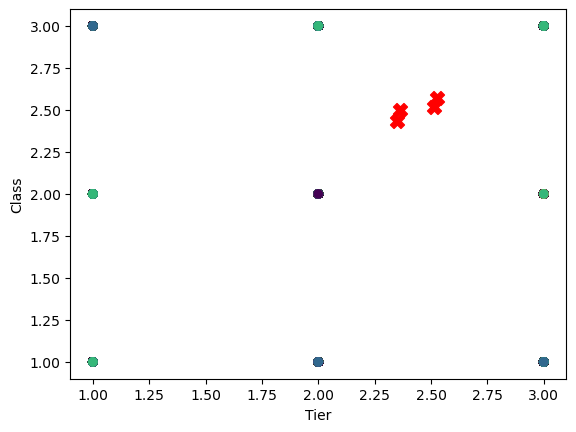

In [329]:
def viz_clusters(kmeans):
    plt.scatter(clusters['Tier'], clusters['class'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 5], kmeans.cluster_centers_[:, 4], 
                color="red",
                marker="X",
                s=100)
    plt.xlabel('Tier')
    plt.ylabel('Class')
    
viz_clusters(kmeans)

### Class vs Tier

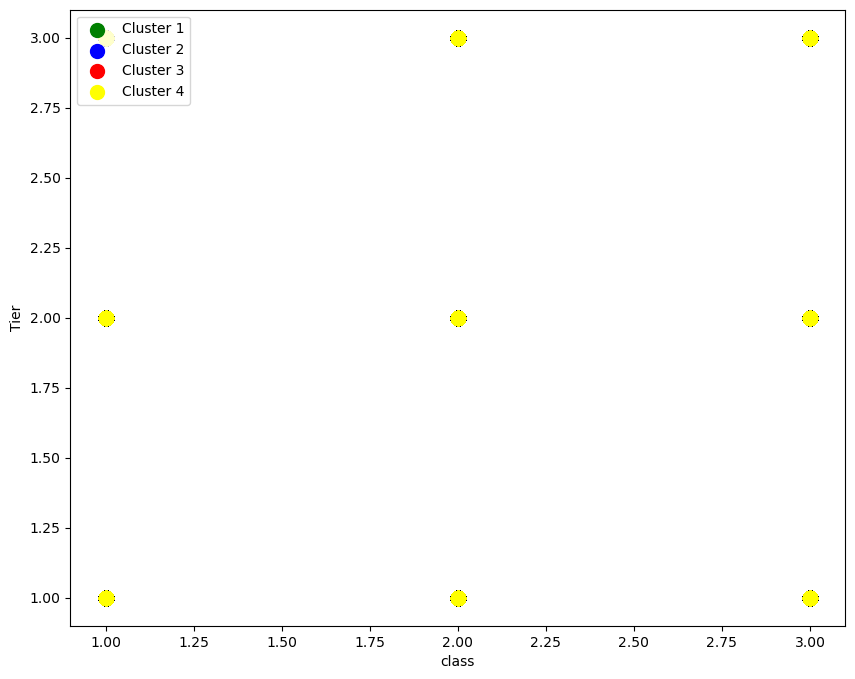

In [330]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(clusters[clusters['label'] == 0]['class'], clusters[clusters['label'] == 0]['Tier'], s=100, c='Green', label='Cluster 1')
plt.scatter(clusters[clusters['label'] == 1]['class'], clusters[clusters['label'] == 1]['Tier'], s=100, c='Blue', label='Cluster 2')
plt.scatter(clusters[clusters['label'] == 2]['class'], clusters[clusters['label'] == 2]['Tier'], s=100, c='Red', label='Cluster 3')
plt.scatter(clusters[clusters['label'] == 3]['class'], clusters[clusters['label'] == 3]['Tier'], s=100, c='Yellow', label='Cluster 4')
plt.xlabel('class')
plt.ylabel('Tier')
plt.legend()
plt.show()

All of the employees belong to cluster 4 when compared class vs Tier

### class vs ctc

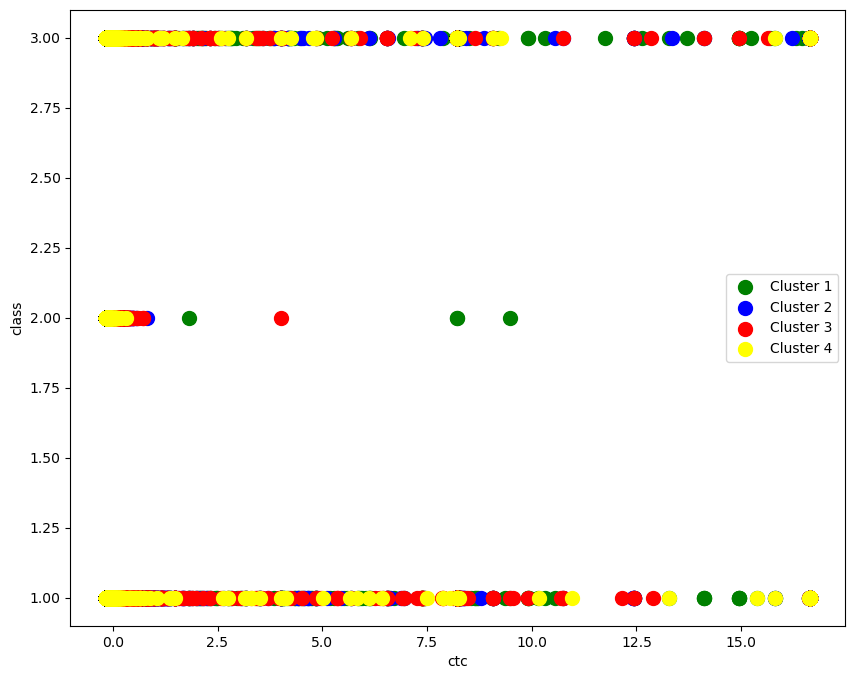

In [331]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(clusters[clusters['label'] == 0]['ctc'], clusters[clusters['label'] == 0]['class'], s=100, c='Green', label='Cluster 1')
plt.scatter(clusters[clusters['label'] == 1]['ctc'], clusters[clusters['label'] == 1]['class'], s=100, c='Blue', label='Cluster 2')
plt.scatter(clusters[clusters['label'] == 2]['ctc'], clusters[clusters['label'] == 2]['class'], s=100, c='Red', label='Cluster 3')
plt.scatter(clusters[clusters['label'] == 3]['ctc'], clusters[clusters['label'] == 3]['class'], s=100, c='Yellow', label='Cluster 4')

plt.xlabel('ctc')
plt.ylabel('class')
plt.legend()
plt.show()

No clear clusters could be found out from the above plot 

The clustering tendency seem to be overlapping

### Elbow Method to find out the ideal number of clusters

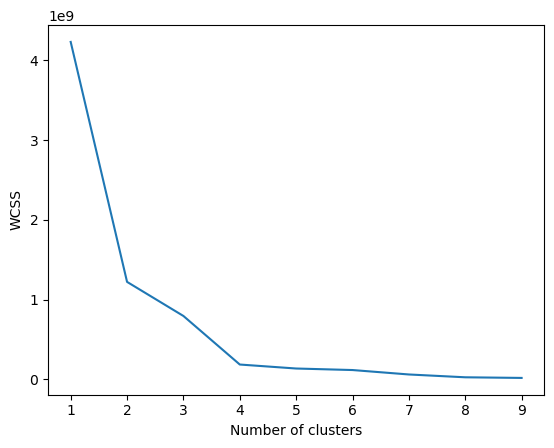

In [332]:
wcss = [] 
for i in range(1, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init='auto',random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss) 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS')
plt.show()

The ideal number of clusters seem to 4 

### Hierarchical Clustering

In [197]:
import scipy.cluster.hierarchy as sch

In [198]:
X

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster
0,-0.106540,410,4,1,1,2,2
1,-0.109067,410,4,3,3,3,2
2,-0.114962,125,4,3,1,3,2
3,-0.148647,28,4,3,3,3,3
4,-0.148647,262,4,3,3,3,3
...,...,...,...,...,...,...,...
152514,0.264001,229,48,3,3,3,3
152515,-0.187386,229,50,3,3,3,3
152516,0.053466,229,1819,3,1,1,3
152517,0.067783,229,119,3,3,3,3


In [210]:
df_sampled=X[:50]

In [211]:
Z = sch.linkage(df_sampled, method='ward')  #linkage = ward

In [212]:
X

,ctc,job_position,Years_of_experience,designation,class,Tier,YoE_Cluster
0,-0.106540,410,4,1,1,2,2
1,-0.109067,410,4,3,3,3,2
2,-0.114962,125,4,3,1,3,2
3,-0.148647,28,4,3,3,3,3
4,-0.148647,262,4,3,3,3,3
...,...,...,...,...,...,...,...
152514,0.264001,229,48,3,3,3,3
152515,-0.187386,229,50,3,3,3,3
152516,0.053466,229,1819,3,1,1,3
152517,0.067783,229,119,3,3,3,3


In [213]:
df_sampled.set_index('class',inplace=True)

In [214]:
df_sampled

,ctc,job_position,Years_of_experience,designation,Tier,YoE_Cluster
class,,,,,,
1,-0.106540,410,4,1,2,2
3,-0.109067,410,4,3,3,2
1,-0.114962,125,4,3,3,2
3,-0.148647,28,4,3,3,3
3,-0.148647,262,4,3,3,3
1,-0.082960,262,4,1,2,2
1,0.146102,125,4,1,1,1
3,-0.131804,125,4,3,3,3
1,-0.005483,125,4,1,1,1


Text(0, 0.5, 'distance')

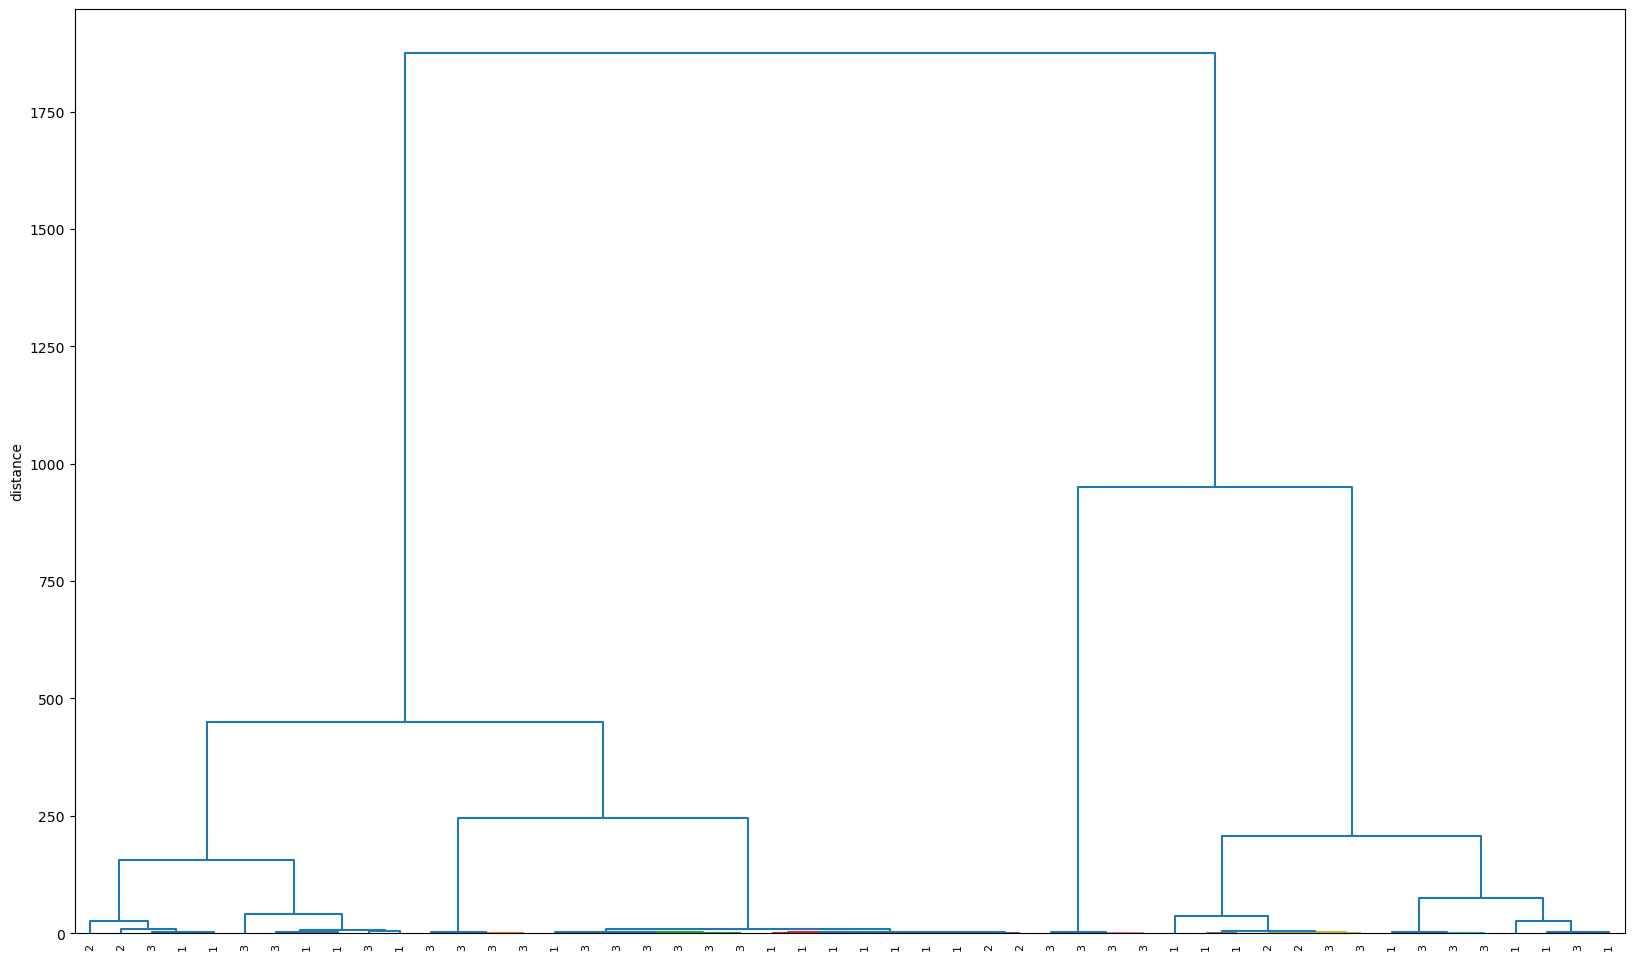

In [215]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=df_sampled.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

From the Hierarchical cluster it seems the ideal number of clusters are 7 